In [110]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [137]:
df = pd.read_csv("speakers_all.csv", header=0)

# Check the data
print(df.shape, 'is the shape of the dataset') 
print('------------------------') 
print(df.head())
df=df.drop(columns=['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'])

(2172, 12) is the shape of the dataset
------------------------
    age  age_onset              birthplace  filename native_language   sex  \
0  24.0       12.0         koussi, senegal   balanta         balanta  male   
1  18.0       10.0          buea, cameroon  cameroon        cameroon  male   
2  48.0        8.0  hong, adamawa, nigeria  fulfulde        fulfulde  male   
3  42.0       42.0   port-au-prince, haiti   haitian         haitian  male   
4  40.0       35.0   port-au-prince, haiti   haitian         haitian  male   

   speakerid   country  file_missing?  Unnamed: 9  Unnamed: 10 Unnamed: 11  
0        788   senegal           True         NaN          NaN         NaN  
1       1953  cameroon           True         NaN          NaN         NaN  
2       1037   nigeria           True         NaN          NaN         NaN  
3       1165     haiti           True         NaN          NaN         NaN  
4       1166     haiti           True         NaN          NaN         NaN  


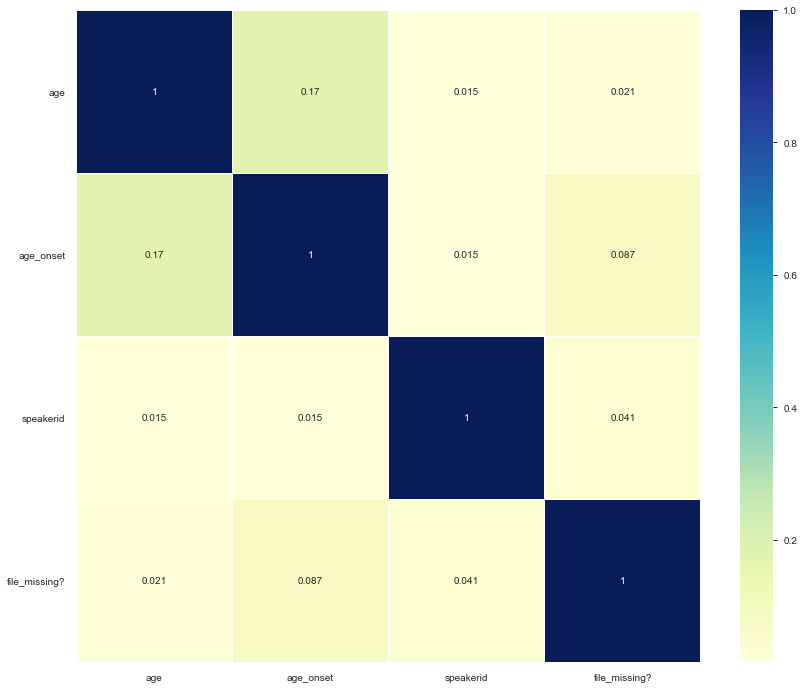

In [138]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [141]:
df = df[df['file_missing?']==False]

In [142]:
## Looking for audios in csv file that is not in the audio dataset
lis = []
df.filename	
DATADIR = 'C:/Users/Ahmed/Desktop/dissertation/archive/recordings/recordings_wave'
for filename in os.listdir(DATADIR):
    lis.append(filename[:-8])

for i in list(df.filename):
    if i not in lis:
        print(i)
        
## Drop these labels from the csv        
df = df.drop(df[df['filename'] == 'sinhalese1'].index)
df = df.drop(df[df['filename'] == 'nicaragua'].index)
df[df['filename'] == 'sinhalese1']
df[df['filename'] == 'nicaragua']
df= df[df['file_missing?']==False]

nicaragua
sinhalese1


In [143]:
df.groupby("native_language")['age'].describe().sort_values(by=['count'],ascending=False)

,count,mean,std,min,25%,50%,75%,max
native_language,,,,,,,,
english,579.0,34.482729,16.734510,6.0,21.00,29.0,44.0,90.0
spanish,162.0,34.129630,13.972528,17.0,23.00,30.0,45.0,80.0
arabic,102.0,30.950980,12.047248,18.0,21.25,28.0,38.0,70.0
mandarin,65.0,30.015385,8.193924,18.0,24.00,28.0,34.0,53.0
french,63.0,33.333333,16.246091,18.0,21.00,27.0,39.0,78.0
...,...,...,...,...,...,...,...,...
nandi,1.0,35.000000,NaN,35.0,35.00,35.0,35.0,35.0
nama,1.0,44.000000,NaN,44.0,44.00,44.0,44.0,44.0
mortlockese,1.0,21.000000,NaN,21.0,21.00,21.0,21.0,21.0


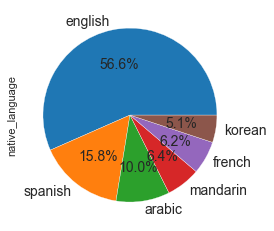

In [144]:
df['native_language'].value_counts().nlargest(6).plot(kind='pie',autopct='%1.1f%%', textprops={'fontsize': 14})

                count unique          top  freq
native_language                                
not_english      1559      1  not_english  1559
english           579      1      english   579


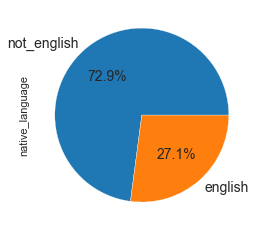

In [147]:
df1 = df.reindex()
df1.loc[df1['native_language'] != 'english', 'native_language'] = 'not_english'
print(df1.groupby("native_language")['native_language'].describe().sort_values(by=['count'],ascending=False))
dfn =  df1.native_language
dfn.to_csv("labels_Binary.csv", sep=',',index=False)

df1['native_language'].value_counts().nlargest(6).plot(kind='pie',autopct='%1.1f%%', textprops={'fontsize': 14})


                count unique       top  freq
native_language                             
other            1167      1     other  1167
english           579      1   english   579
spanish           162      1   spanish   162
arabic            102      1    arabic   102
mandarin           65      1  mandarin    65
french             63      1    french    63


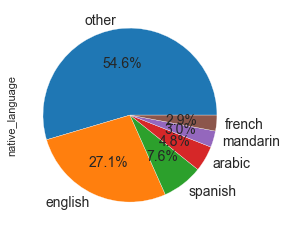

In [148]:
df2 = df.reindex()
df2.loc[~df2['native_language'].isin(['english', 'spanish', 'arabic', 'mandarin','french']),'native_language']='other'
print(df2.groupby("native_language")['native_language'].describe().sort_values(by=['count'],ascending=False))
dfn1 =  df2.native_language
dfn1.to_csv("labels_Multi_Class.csv", sep=',',index=False)

df2['native_language'].value_counts().nlargest(6).plot(kind='pie',autopct='%1.1f%%', textprops={'fontsize': 14})